In [217]:
#importa as libs necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [218]:
#0. Os arquivos CSV não permitia leitura correta dos dados, então foi necessário ajustar o arquivo para que a leitura fosse feita corretamente.
#Lista de arquivos CSV e seus correspontendes em TXT

files = [
    {'csv': 'Retail_Data.csv', 'txt': 'Retail_Data.txt'},
    {'csv': 'Potential_Customers.csv', 'txt': 'Potential_Customers.txt'}
]

for file in files:
    #Converte arquivos CSV em TXT
    csv_file_path = file['csv']
    txt_file_path = file['txt']

    #Carrega arquivos CSV em um DataFrame
    df = pd.read_csv(csv_file_path)
    
    #Salva os arquivos em formato TXT com tabulação como demlimitador
    df.to_csv(txt_file_path, sep='\t', index=False)
    print(f'Arquivo {csv_file_path} convertido para {txt_file_path}')

    #Ajusta o parâmetro 'delimiter' para '\t' para que o arquivo seja lido corretamente
    df = pd.read_csv(txt_file_path, delimiter='\t')

    #Salva os arquivos em formato CSV
    df.to_csv(csv_file_path, index=False)
    print(f'Arquivo {txt_file_path} convertido para {csv_file_path}')

Arquivo Retail_Data.csv convertido para Retail_Data.txt
Arquivo Retail_Data.txt convertido para Retail_Data.csv
Arquivo Potential_Customers.csv convertido para Potential_Customers.txt
Arquivo Potential_Customers.txt convertido para Potential_Customers.csv


In [219]:
#0.1 Aqui começa o carregamento e tratamento dos dados
#Carrega os dados
retail_data = pd.read_csv('Retail_Data.csv')
potential_customers = pd.read_csv('Potential_Customers.csv')

#Remove os espaços em branco
retail_data.columns = retail_data.columns.str.strip()
potential_customers.columns = potential_customers.columns.str.strip()

#Trata os caracteres invisíveis
retail_data.rename(columns=lambda x: x.strip(), inplace=True)
potential_customers.rename(columns=lambda x: x.strip(), inplace=True)

In [220]:
#Valida o retorno das colunas
print(retail_data.columns)
print(potential_customers.columns)

Index(['Cocunut', 'Mortgage_YN', 'AGE_AT_ORIGINATION', 'AGE',
       'YEARS_WITH_BANK', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT',
       'GENDER', 'CUST_INCOME', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE',
       'CURRENT_WITH_BANK_DATE', 'CURRENT_BALANCE_EUR'],
      dtype='object')
Index(['Cocunut', 'AGE', 'YEARS_WITH_BANK', 'MARTIAL_STATUS', 'EDUCATION',
       'EMPLOYMENT', 'GENDER', 'CUST_INCOME', 'CURRENT_ADDRESS_DATE',
       'CURRENT_JOB_DATE', 'CURRENT_WITH_BANK_DATE', 'CURRENT_BALANCE_EUR'],
      dtype='object')


In [221]:
#Valida o retorno dos dados
print(retail_data.head())
print(potential_customers.head())

   Cocunut Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK  \
0        1           Y                50.0   52               13   
1        9           Y                48.0   49               11   
2       11           Y                53.0   55               14   
3       12           Y                64.0   66               10   
4       18           Y                46.0   47                9   

  MARTIAL_STATUS EDUCATION EMPLOYMENT GENDER  CUST_INCOME  \
0              M       HGH        PVE      M  909,5013077   
1              M       HGH        SFE      M  288,4615385   
2              M       BCR        STE      M  1280,528692   
3              M       BCR        OTH      F  620,9597692   
4              S       MAS        PVE      F  2239,853846   

  CURRENT_ADDRESS_DATE CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  \
0           18/04/1979       01/01/2010             16/03/2004   
1           16/12/1999       20/01/2004             07/11/2005   
2           28/06/2005    

In [222]:
#Valida a contagem de dados (amostra)
print(retail_data['Mortgage_YN'].value_counts())

Mortgage_YN
N    23677
Y      306
Name: count, dtype: int64


In [223]:
#0.2 Com os dados tratados, inio a análise exploratória
#Filtra os clientes que receberam empréstimos
clientes_com_emprestimo = retail_data[retail_data['Mortgage_YN'] == 'Y']
print(clientes_com_emprestimo.head())
print(clientes_com_emprestimo.shape)

   Cocunut Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK  \
0        1           Y                50.0   52               13   
1        9           Y                48.0   49               11   
2       11           Y                53.0   55               14   
3       12           Y                64.0   66               10   
4       18           Y                46.0   47                9   

  MARTIAL_STATUS EDUCATION EMPLOYMENT GENDER  CUST_INCOME  \
0              M       HGH        PVE      M  909,5013077   
1              M       HGH        SFE      M  288,4615385   
2              M       BCR        STE      M  1280,528692   
3              M       BCR        OTH      F  620,9597692   
4              S       MAS        PVE      F  2239,853846   

  CURRENT_ADDRESS_DATE CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  \
0           18/04/1979       01/01/2010             16/03/2004   
1           16/12/1999       20/01/2004             07/11/2005   
2           28/06/2005    

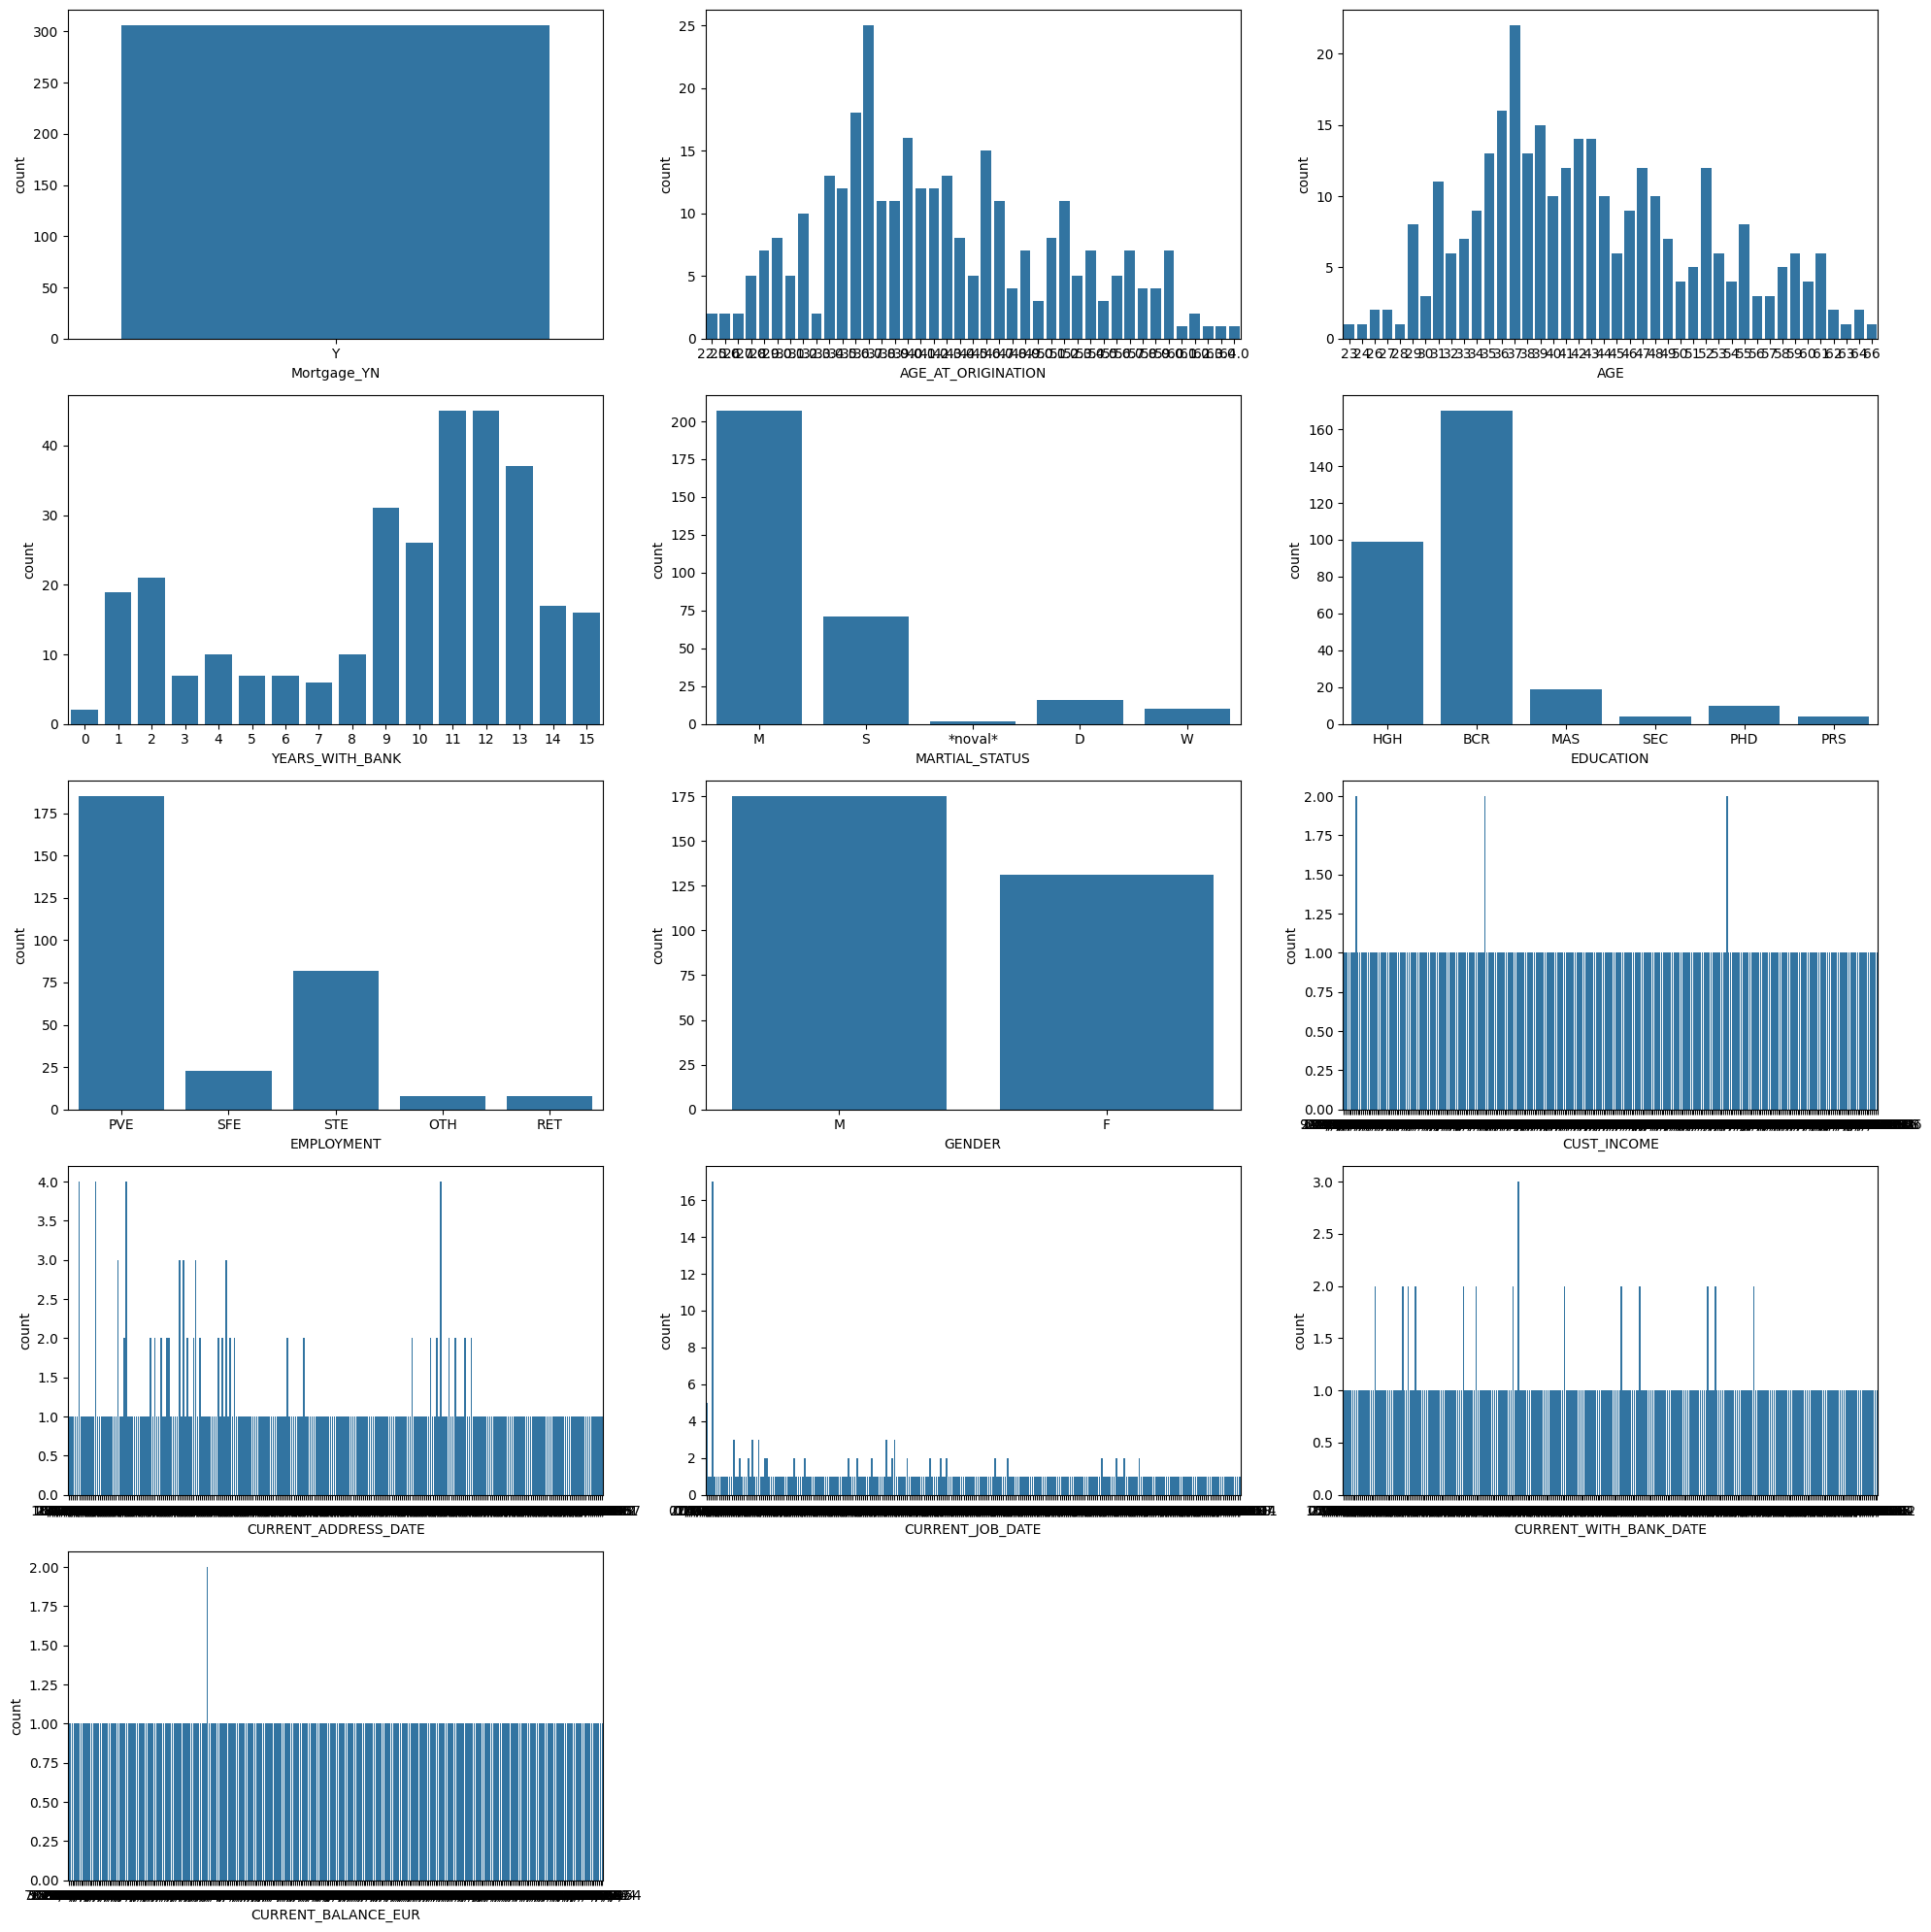

In [224]:
#1. Aqui inicio as questões com respostas baseadas na análise exploratória dos dados
#1.1 Quais características dos clientes que possuem empréstimos são mais comuns?
caracteristicas = ['Mortgage_YN', 'AGE_AT_ORIGINATION', 'AGE', 'YEARS_WITH_BANK', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT', 'GENDER', 'CUST_INCOME', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE', 'CURRENT_WITH_BANK_DATE', 'CURRENT_BALANCE_EUR']

# Calcula o número de linhas e colunas necessárias para os subplots
num_caracteristicas = len(caracteristicas)
num_cols = 3
num_rows = (num_caracteristicas + num_cols - 1) // num_cols

# Crio a grade de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Ploto cada característica
for i, caracteristica in enumerate(caracteristicas):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=caracteristica, data=clientes_com_emprestimo, ax=axes[row, col])

# Excluo subplots vazios
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()
    

In [ ]:
#Resposta da questão 1.1: Pessoas casadas, com título Bachelor, empregadas em empresas privadas, do sexo masculino, com renda de 50k a 100k, com idade entre 30 e 40 anos, com 10 a 20 anos de experiência no banco, com 10 a 20 anos de emprego atual, com 10 a 20 anos de endereço atual, com saldo atual de 0 a 10k são as características mais comuns dos clientes que possuem empréstimos.

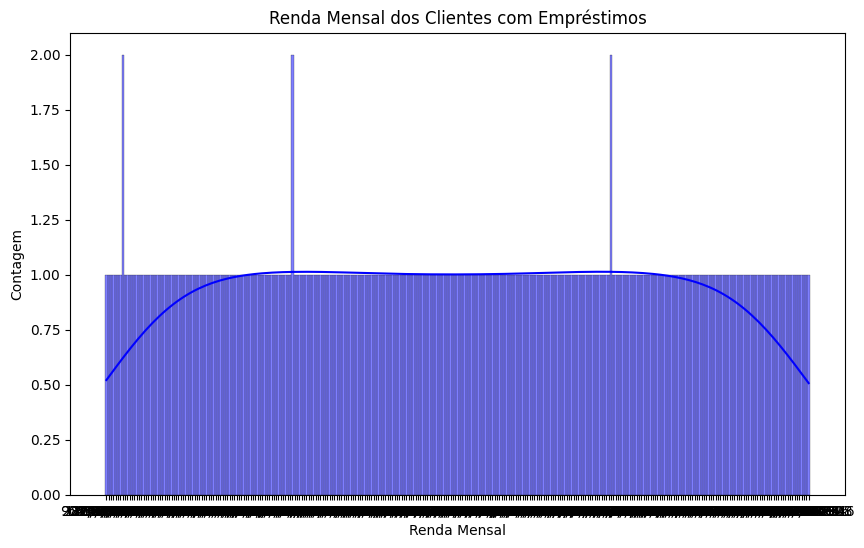

In [225]:
#1.2 Existe uma faixa de renda mensal que é mais propensa a receber empréstimos?
plt.figure(figsize=(10, 6))
sns.histplot(clientes_com_emprestimo['CUST_INCOME'], kde=True, color='blue')
plt.title('Renda Mensal dos Clientes com Empréstimos')
plt.ylabel('Contagem')
plt.xlabel('Renda Mensal')
plt.show()


In [ ]:
#Resposta da questão 1.2: A faixa de renda mensal de até 3k é a mais propensa a receber empréstimos.

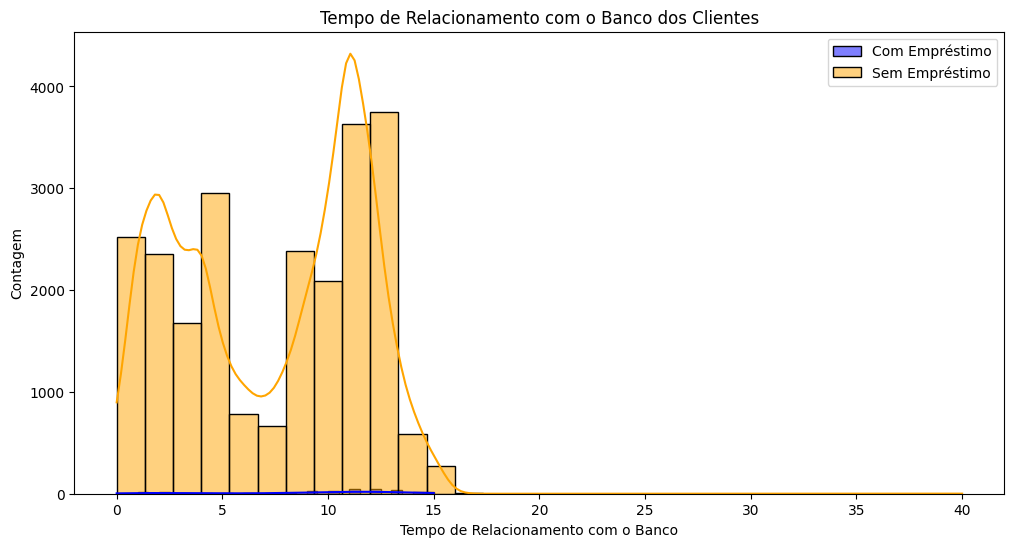

In [226]:
#1.3 O tempo de relacionamento com o banco influencia a probabilidade de um cliente receber um empréstimo?
clientes_com_emprestimo = retail_data[retail_data['Mortgage_YN'] == 'Y']
clientes_sem_emprestimo = retail_data[retail_data['Mortgage_YN'] == 'N']
plt.figure(figsize=(12, 6))
sns.histplot(clientes_com_emprestimo['YEARS_WITH_BANK'], kde=True, color='blue', label='Com Empréstimo', bins=30)
sns.histplot(clientes_sem_emprestimo['YEARS_WITH_BANK'], kde=True, color='orange', label='Sem Empréstimo', bins=30)
plt.title('Tempo de Relacionamento com o Banco dos Clientes')
plt.ylabel('Contagem')
plt.xlabel('Tempo de Relacionamento com o Banco')
plt.legend()
plt.show()

In [ ]:
#Resposta da questão 1.3: Pessoas com relacionamento com o banco entre 10 a 20 anos tem maior probabilidade de receber um empréstimo.

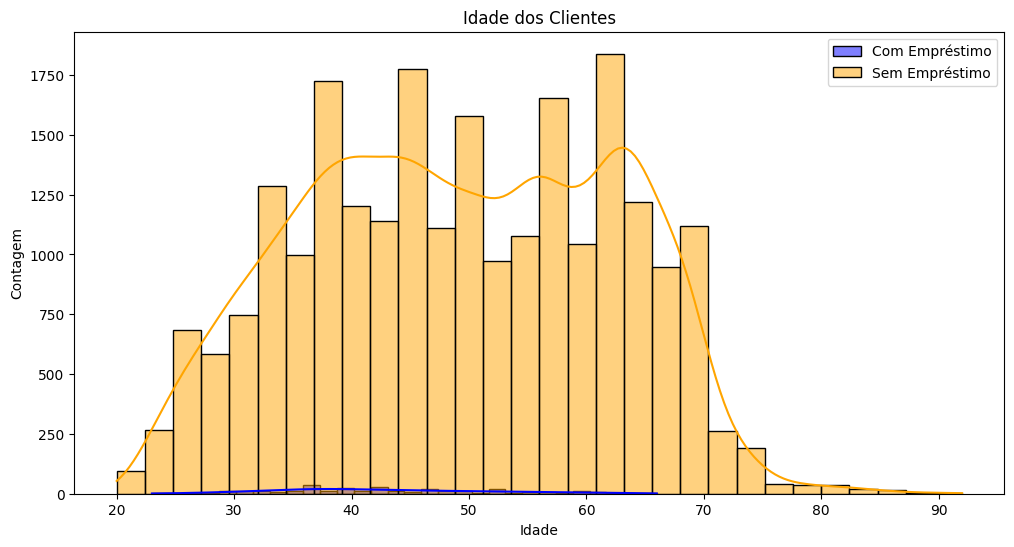

In [227]:
#1.4 A idade dos clientes influencia a probabilidade de um cliente receber um empréstimo?
plt.figure(figsize=(12, 6))
sns.histplot(clientes_com_emprestimo['AGE'], kde=True, color='blue', label='Com Empréstimo', bins=30)
sns.histplot(clientes_sem_emprestimo['AGE'], kde=True, color='orange', label='Sem Empréstimo', bins=30)
plt.title('Idade dos Clientes')
plt.ylabel('Contagem')
plt.xlabel('Idade')
plt.legend()
plt.show()

In [ ]:
#Resposta da questão 1.4: Pessoas com idade entre 30 e 40 anos de idade tem maior probabilidade de receber um empréstimo.

C:\Users\denis_m3q36di\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


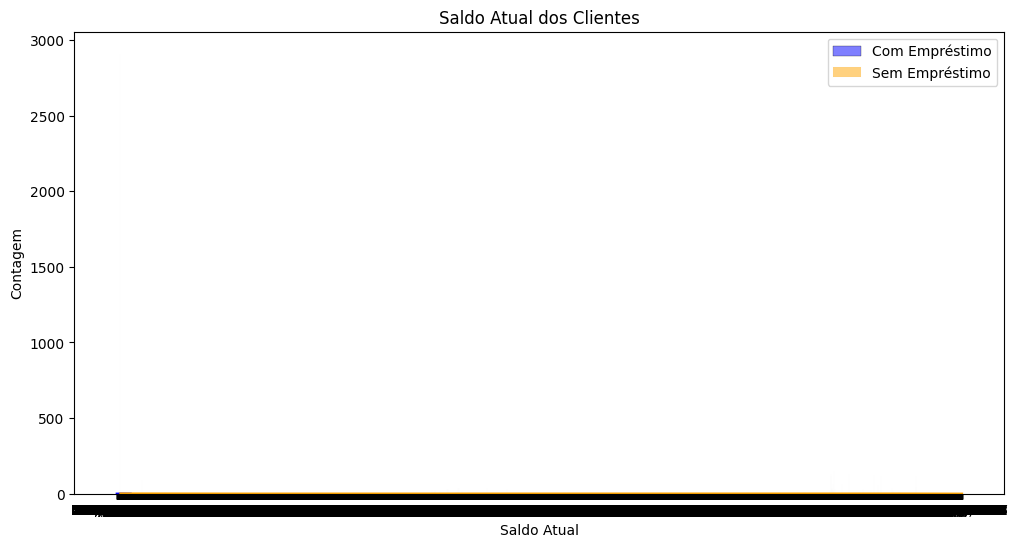

In [228]:
#1.5 O saldo atual dos clientes influencia a probabilidade de um cliente receber um empréstimo?
plt.figure(figsize=(12, 6))
sns.histplot(clientes_com_emprestimo['CURRENT_BALANCE_EUR'], kde=True, color='blue', label='Com Empréstimo', bins=30)
sns.histplot(clientes_sem_emprestimo['CURRENT_BALANCE_EUR'], kde=True, color='orange', label='Sem Empréstimo', bins=30)
plt.title('Saldo Atual dos Clientes')
plt.ylabel('Contagem')
plt.xlabel('Saldo Atual')
plt.legend()
plt.show()

In [ ]:
#Resposta da questão 1.5: O saldo atual dos clientes até 10k tem maior probabilidade de receber um empréstimo.

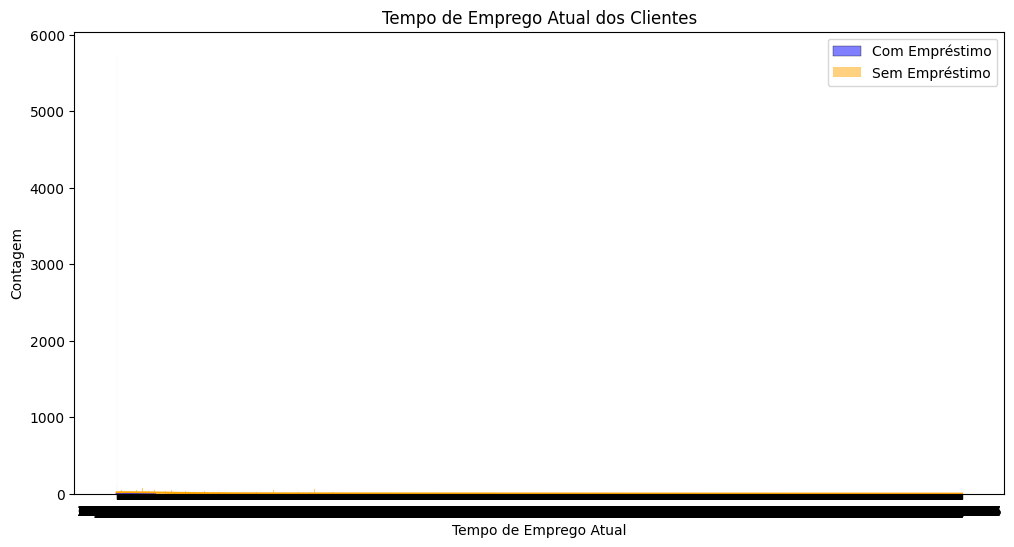

In [229]:
#1.6 O tempo de emprego atual dos clientes influencia a probabilidade de um cliente receber um empréstimo?
plt.figure(figsize=(12, 6))
sns.histplot(clientes_com_emprestimo['CURRENT_JOB_DATE'], kde=True, color='blue', label='Com Empréstimo', bins=30)
sns.histplot(clientes_sem_emprestimo['CURRENT_JOB_DATE'], kde=True, color='orange', label='Sem Empréstimo', bins=30)
plt.title('Tempo de Emprego Atual dos Clientes')
plt.ylabel('Contagem')
plt.xlabel('Tempo de Emprego Atual')
plt.legend()
plt.show()

In [ ]:
#Resposta da questão 1.6: Pessoas com 10 a 20 anos no emprego atual tem maior probabilidade de receber um empréstimo.

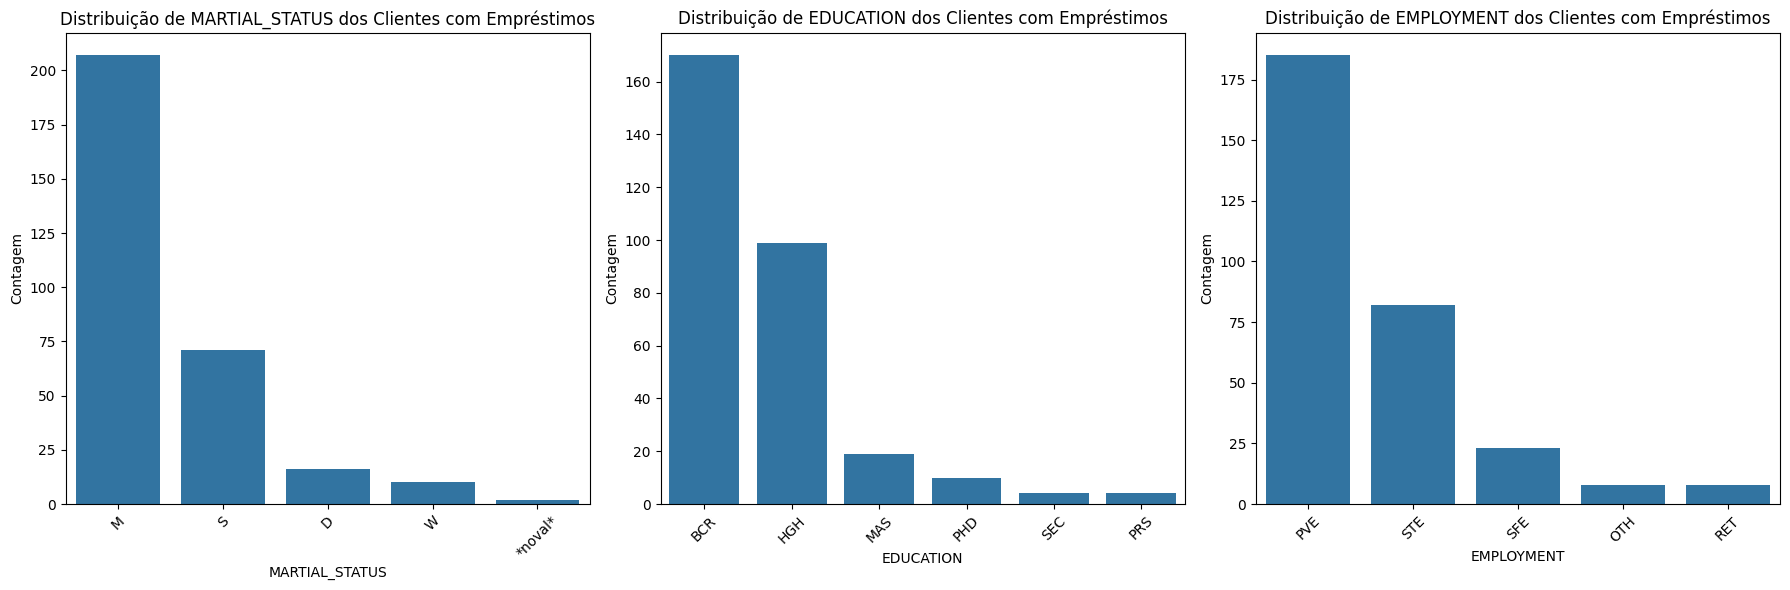

In [230]:
#1.7 Quais segmentos de clientes com características demográficas específicas são mais propensos a receber empréstimos?
caracteristicas = ['MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, caracteristica in enumerate(caracteristicas):
    sns.countplot(data=clientes_com_emprestimo, x=caracteristica, order=clientes_com_emprestimo[caracteristica].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribuição de {caracteristica} dos Clientes com Empréstimos')    
    axes[i].set_xlabel(caracteristica)
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

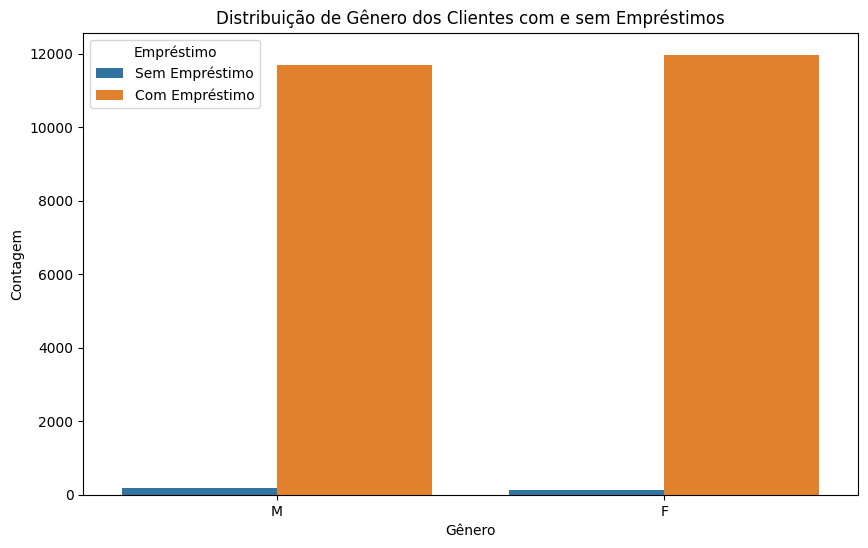

In [231]:
#1.7.1 O genero dos clientes influencia a probabilidade de um cliente receber um empréstimo?
plt.figure(figsize=(10, 6))
sns.countplot(data=retail_data, x='GENDER', hue='Mortgage_YN')
plt.title('Distribuição de Gênero dos Clientes com e sem Empréstimos')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Empréstimo', labels=['Sem Empréstimo', 'Com Empréstimo'])
plt.show()

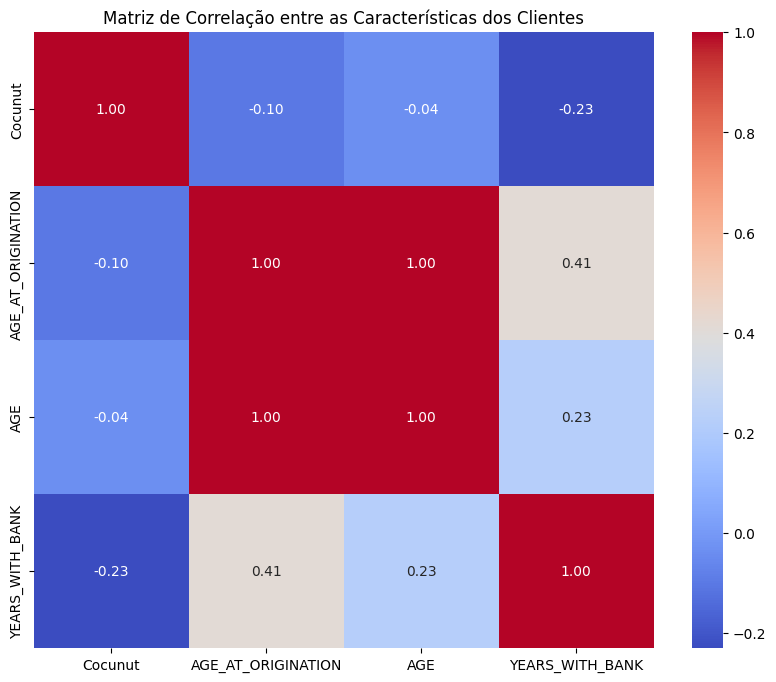

In [232]:
#Matriz de correlação entre as características dos clientes
numeric_cols = retail_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = retail_data[numeric_cols]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre as Características dos Clientes')
plt.show()

In [ ]:
#Resposta da questão 1.7: Pessoas casadas, com título Bachelor, empregadas em empresas privadas, são as características mais comuns dos clientes que possuem empréstimos.

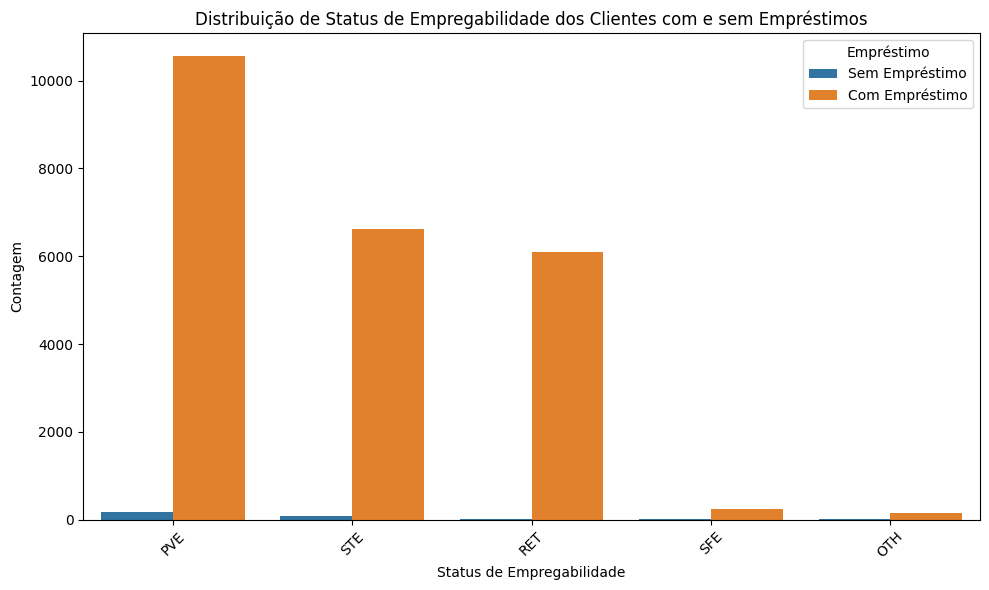

In [233]:
#1.8 O status de empregabilidade tem impacto significativo na decisão de concessão de empréstimos?
plt.figure(figsize=(10, 6))
sns.countplot(data=retail_data, x='EMPLOYMENT', hue='Mortgage_YN', order=retail_data['EMPLOYMENT'].value_counts().index)
plt.title('Distribuição de Status de Empregabilidade dos Clientes com e sem Empréstimos')
plt.xlabel('Status de Empregabilidade')
plt.ylabel('Contagem')
plt.legend(title='Empréstimo', labels=['Sem Empréstimo', 'Com Empréstimo'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Resposta da questão 1.8: Sim, é fator de decisão. Pessoas empregadas tem muita probabilidade de ter sucesso ao tomar empréstimo, vide gráfico com destaque para empregados privados, públicos e aposentados.

C:\Users\denis_m3q36di\AppData\Local\Temp\ipykernel_8100\3612823420.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\denis_m3q36di\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


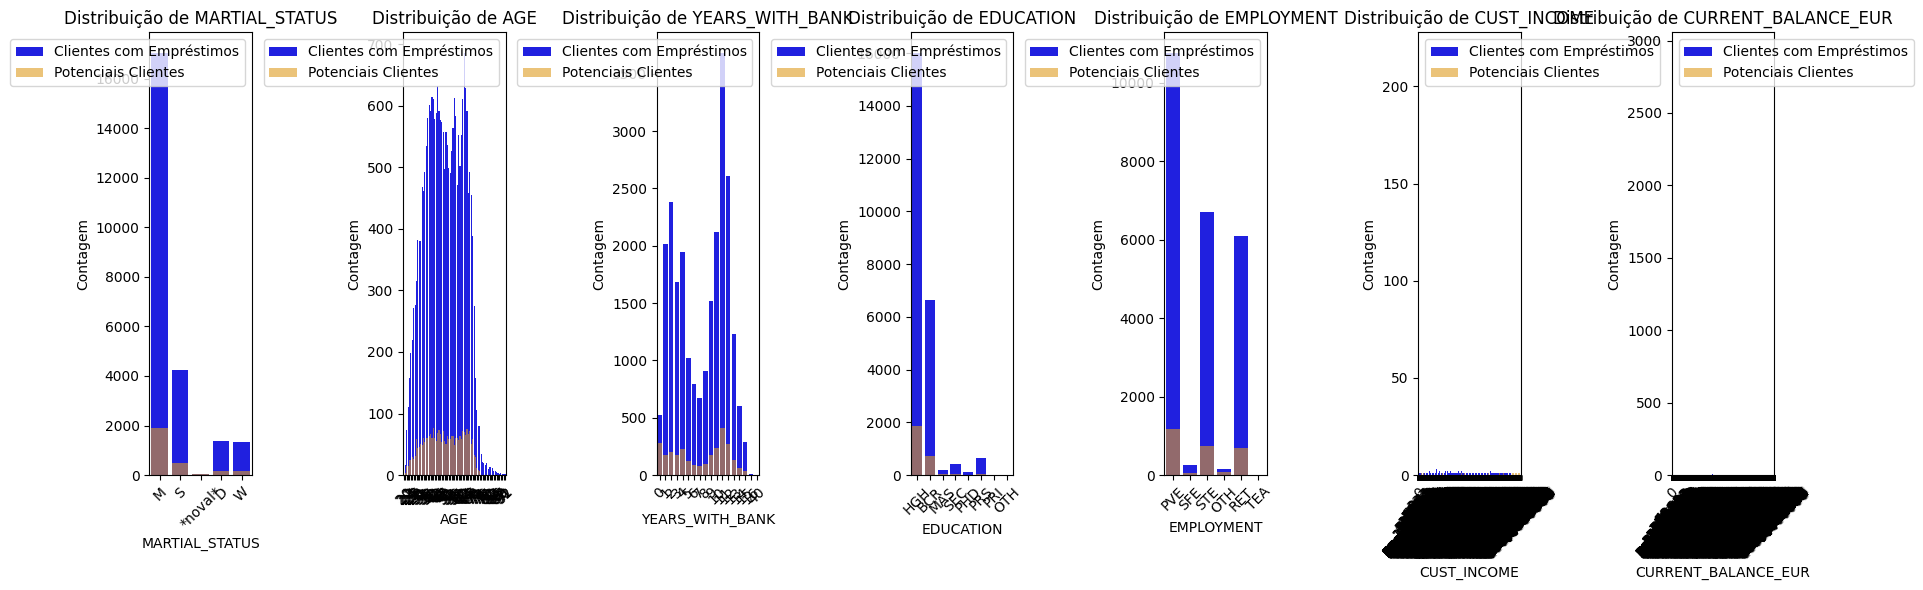

In [234]:
#1.9 Como os potenciais clientes se comparam aos clientes que já possuem emprétimos em termos de perfil e comportamento financeiro?
demographic_features = ['MARTIAL_STATUS', 'AGE', 'YEARS_WITH_BANK', 'EDUCATION', 'EMPLOYMENT', 'CUST_INCOME', 'CURRENT_BALANCE_EUR']
fig, axes = plt.subplots(1, 7, figsize=(18, 6))
for i, feature in enumerate(demographic_features):
    sns.countplot(data=retail_data, x=feature, ax=axes[i], color='blue', label='Clientes com Empréstimos')
    sns.countplot(data=potential_customers, x=feature, ax=axes[i], color='orange', label='Potenciais Clientes', alpha=0.6)
    axes[i].set_title(f'Distribuição de {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()
plt.tight_layout()
plt.show()    

In [ ]:
#Resposta da questão 1.9: Os potenciais clientes são mais jovens, casados, com menos tempo de relacionamento com o banco, com menor renda mensal, com menor saldo atual, com menor tempo de emprego atual, com menor tempo de endereço atual

C:\Users\denis_m3q36di\AppData\Local\Temp\ipykernel_8100\2898791551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_com_emprestimo['CUST_INCOME'] = pd.to_numeric(clientes_com_emprestimo['CUST_INCOME'], errors='coerce')
C:\Users\denis_m3q36di\AppData\Local\Temp\ipykernel_8100\2898791551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_sem_emprestimo['CUST_INCOME'] = pd.to_numeric(clientes_sem_emprestimo['CUST_INCOME'], errors='coerce')
C:\Users\denis_m3q36di\AppData\Local\Temp\ipyker

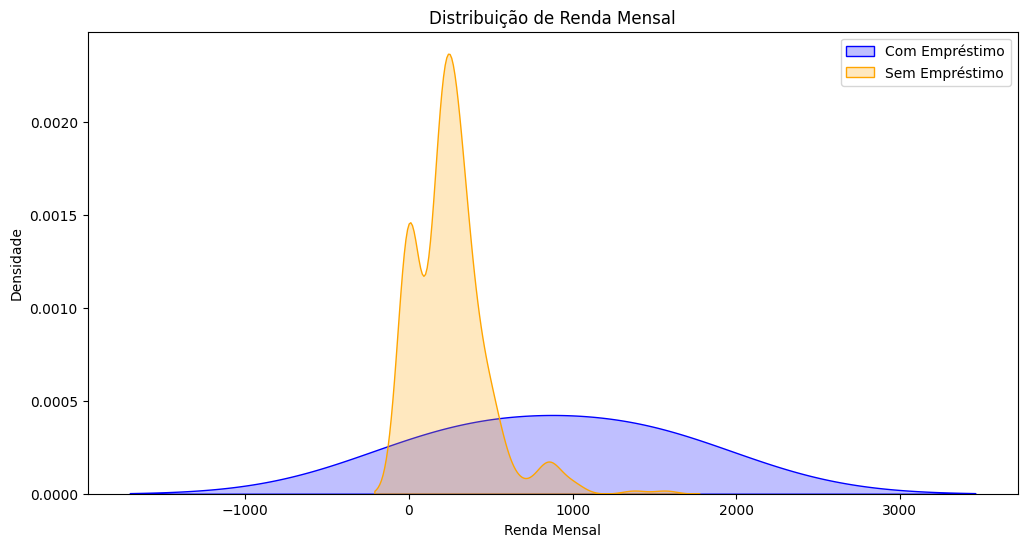

In [235]:
#1.10 Como a renda mensal influencia a decisão de concessão de empréstimos?
clientes_com_emprestimo['CUST_INCOME'] = pd.to_numeric(clientes_com_emprestimo['CUST_INCOME'], errors='coerce')
clientes_sem_emprestimo['CUST_INCOME'] = pd.to_numeric(clientes_sem_emprestimo['CUST_INCOME'], errors='coerce')

clientes_com_emprestimo = clientes_com_emprestimo.dropna(subset=['CUST_INCOME'])
clientes_sem_emprestimo = clientes_sem_emprestimo.dropna(subset=['CUST_INCOME'])

plt.figure(figsize=(12, 6))
sns.kdeplot(clientes_com_emprestimo['CUST_INCOME'], color='blue', label='Com Empréstimo', shade=True)
sns.kdeplot(clientes_sem_emprestimo['CUST_INCOME'], color='orange', label='Sem Empréstimo', shade=True)
plt.title('Distribuição de Renda Mensal')
plt.xlabel('Renda Mensal')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [ ]:
#Resposta da questão 1.10: A renda mensal influencia a decisão de concessão de empréstimos, pois a distribuição de renda mensal dos clientes com empréstimos é mais alta do que a distribuição de renda mensal dos clientes sem empréstimos.

In [236]:
#1.11 Com quantos anos de relacionamento com o banco em média os clientes recebem empréstimos?
anos_com_emprestimo = clientes_com_emprestimo['YEARS_WITH_BANK'].mean()
print(f'Em média os clientes com {anos_com_emprestimo} anos de relacionamento com o banco recebem empréstimos, dentro do perfil mapeado.')

Em média os clientes com 6.5 anos de relacionamento com o banco recebem empréstimos, dentro do perfil mapeado.


In [ ]:
#Resposta da questão 1.11: Em média os clientes com 6.5 anos de relacionamento com o banco recebem empréstimos.

In [237]:
#2. Aqui inicia a criação e validação do modelo
#Carrega os dados
retail_data = pd.read_csv('Retail_Data.csv')
potential_customers = pd.read_csv('Potential_Customers.csv')

#Remove os espaços em branco
retail_data.columns = retail_data.columns.str.strip()
potential_customers.columns = potential_customers.columns.str.strip()

#Trata os caracteres invisíveis
retail_data.rename(columns=lambda x: x.strip(), inplace=True)
potential_customers.rename(columns=lambda x: x.strip(), inplace=True)

#Converte a coluna 'CUST_INCOME' para numérico, substituindo virgula por ponto
retail_data['CUST_INCOME'] = retail_data['CUST_INCOME'].str.replace(',', '.').astype(float)
potential_customers['CUST_INCOME'] = potential_customers['CUST_INCOME'].str.replace(',', '.').astype(float)

#Converte a coluna 'CURRENT_BALANCE_EUR' para numérico, substituindo virgula por ponto
retail_data['CURRENT_BALANCE_EUR'] = retail_data['CURRENT_BALANCE_EUR'].str.replace(',', '.').astype(float)
potential_customers['CURRENT_BALANCE_EUR'] = potential_customers['CURRENT_BALANCE_EUR'].str.replace(',', '.').astype(float)

#Valida o retorno das colunas
print(retail_data.columns)
print(potential_customers.columns)



Index(['Cocunut', 'Mortgage_YN', 'AGE_AT_ORIGINATION', 'AGE',
       'YEARS_WITH_BANK', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT',
       'GENDER', 'CUST_INCOME', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE',
       'CURRENT_WITH_BANK_DATE', 'CURRENT_BALANCE_EUR'],
      dtype='object')
Index(['Cocunut', 'AGE', 'YEARS_WITH_BANK', 'MARTIAL_STATUS', 'EDUCATION',
       'EMPLOYMENT', 'GENDER', 'CUST_INCOME', 'CURRENT_ADDRESS_DATE',
       'CURRENT_JOB_DATE', 'CURRENT_WITH_BANK_DATE', 'CURRENT_BALANCE_EUR'],
      dtype='object')


In [238]:
#Valida o retorno dos dados
print(retail_data.head())
print(potential_customers.head())

   Cocunut Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK  \
0        1           Y                50.0   52               13   
1        9           Y                48.0   49               11   
2       11           Y                53.0   55               14   
3       12           Y                64.0   66               10   
4       18           Y                46.0   47                9   

  MARTIAL_STATUS EDUCATION EMPLOYMENT GENDER  CUST_INCOME  \
0              M       HGH        PVE      M   909.501308   
1              M       HGH        SFE      M   288.461539   
2              M       BCR        STE      M  1280.528692   
3              M       BCR        OTH      F   620.959769   
4              S       MAS        PVE      F  2239.853846   

  CURRENT_ADDRESS_DATE CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  \
0           18/04/1979       01/01/2010             16/03/2004   
1           16/12/1999       20/01/2004             07/11/2005   
2           28/06/2005    

In [239]:
# Carrega os dados dos clientes que receberam empréstimos
#retail_data = pd.read_csv('Retail_Data.csv')

#Seleciona as features e o target
features=['YEARS_WITH_BANK', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT', 'CUST_INCOME', 'CURRENT_BALANCE_EUR']
x = retail_data[features]
y = retail_data['Mortgage_YN']

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Define as colunas categóricas e numéricas
categorical_features = ['MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT']
numeric_features = ['YEARS_WITH_BANK', 'CUST_INCOME', 'CURRENT_BALANCE_EUR']

# Cria os transformadores para as colunas numéricas e categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Cria o ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Cria o pipeline com o preprocessor e o classificador
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajusta o pipeline aos dados de treino
pipeline.fit(X_train, y_train)

# Faz previsão para os potenciais clientes
potential_customers_transformed = pipeline.named_steps['preprocessor'].transform(potential_customers[features])
predictions = pipeline.named_steps['classifier'].predict(potential_customers_transformed)
limiar = 0.3

# Adiciona as previsões ao DataFrame dos potenciais clientes
potential_customers['previsao_emprestimo'] = predictions

# Exibe os potenciais clientes que têm maior probabilidade de receber empréstimos
clientes_abordar = potential_customers[potential_customers['previsao_emprestimo'] == 1]
print(clientes_abordar)

Empty DataFrame
Columns: [Cocunut, AGE, YEARS_WITH_BANK, MARTIAL_STATUS, EDUCATION, EMPLOYMENT, GENDER, CUST_INCOME, CURRENT_ADDRESS_DATE, CURRENT_JOB_DATE, CURRENT_WITH_BANK_DATE, CURRENT_BALANCE_EUR, previsao_emprestimo]
Index: []


C:\Users\denis_m3q36di\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


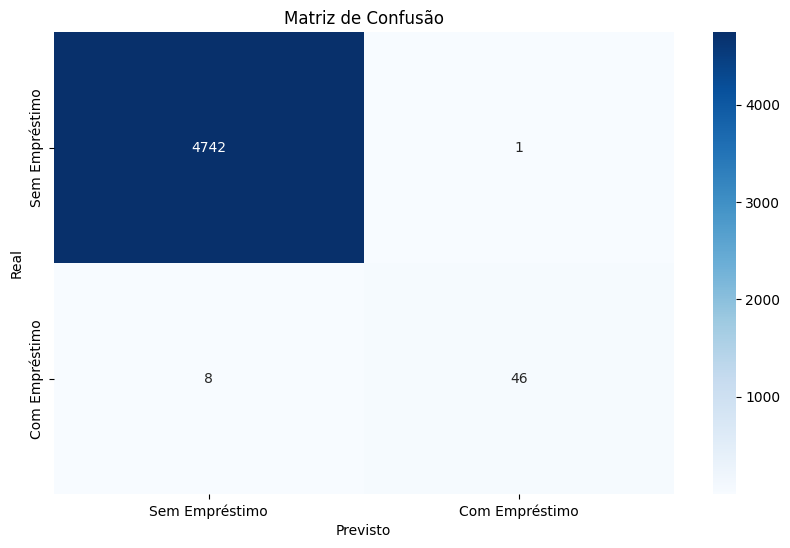

In [240]:
#3. Aqui inicio a Matriz de confusão para validação do modelo

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Empréstimo', 'Com Empréstimo'], yticklabels=['Sem Empréstimo', 'Com Empréstimo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [241]:
#Faz previsão para os potenciais clientes
potential_customers_transformed = pipeline.named_steps['preprocessor'].transform(potential_customers[features])
predictions = pipeline.named_steps['classifier'].predict(potential_customers_transformed)

#Adiciona as previsões ao DataFrame dos potenciais clientes
potential_customers['previsao_emprestimo'] = predictions

#Obtem a probabilidade
probabilidades = pipeline.named_steps['classifier'].predict_proba(potential_customers_transformed)

#Adiciona as probabilidades ao DataFrame dos potenciais clientes
potential_customers['probabilidade_emprestimo'] = probabilidades[:, 1]

#Exibe a probabilidade de concessão de empréstimo para os potenciais clientes
print(potential_customers[['probabilidade_emprestimo', 'previsao_emprestimo']])

      probabilidade_emprestimo previsao_emprestimo
0                     0.000075                   N
1                     0.001188                   N
2                     0.000859                   N
3                     0.001766                   N
4                     0.000981                   N
...                        ...                 ...
2742                  0.004827                   N
2743                  0.000143                   N
2744                  0.000217                   N
2745                  0.000209                   N
2746                  0.020949                   N

[2747 rows x 2 columns]


C:\Users\denis_m3q36di\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [242]:
#Ajusta o tresold
threshold = 0.01
clientes_abordar = potential_customers[potential_customers['probabilidade_emprestimo'] > threshold]
print(clientes_abordar)

      Cocunut  AGE  YEARS_WITH_BANK MARTIAL_STATUS EDUCATION EMPLOYMENT  \
9       80010   42               13              M       BCR        PVE   
21      80022   30                8              M       BCR        PVE   
28      80029   46               15              M       BCR        STE   
36      80037   47               11              M       HGH        STE   
38      80039   42               13              M       HGH        PVE   
...       ...  ...              ...            ...       ...        ...   
2706    82707   36                6              M       HGH        PVE   
2715    82716   38               11              M       HGH        STE   
2719    82720   52                3              M       HGH        PVE   
2732    82733   39               12              M       BCR        PVE   
2746    82747   44               14              M       HGH        PVE   

     GENDER  CUST_INCOME CURRENT_ADDRESS_DATE CURRENT_JOB_DATE  \
9         F   228.076923         

In [243]:
#Exibe a contagem de clientes a abordar
print(f'contagem de clientes a abordar: {len(clientes_abordar)}')

contagem de clientes a abordar: 215


In [176]:
#Conclusão: O gerente deve abordar 215 clientes para oferecer empréstimos, com base no modelo de regressão logística.